In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
from pythonds.basic.stack import Stack

In [7]:
# Reading in data and assigning it to variables even though Greg seems to think it's a waste of time.

# Read in data
# hdulist = fits.open('http://portal.nersc.gov/project/cosmo/data/legacysurvey/dr3/external/survey-dr3-specObj-dr13.fits') # survey
# hdulist2 = fits.open('https://data.sdss.org/sas/dr13/sdss/spectro/redux/specObj-dr13.fits')
# tbdata = hdulist[1].data
# tbdata2 = hdulist2[1].data

hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010.fits') # this is one brick of the DECaLS data
SpecObj_data = hdulist[1].data
SDSS_data = hdulist2[1].data
DECaLS_data = hdulist3[1].data

# print(len(SpecObj_data))
# print(len(SDSS_data))
# print(len(DECaLS_data))

# Put data in arrays

# Read in data from SDSS file

# Redshift of galaxies according to sdss
redshift = []
redshift = SDSS_data.field('Z') 

# Class of object
gal_class = []
gal_class = SDSS_data.field('CLASS')

# What survey the data is from
survey = []
survey = SDSS_data.field('SURVEY')

# SPECPRIMARY; set to 1 for primary observation of object, 0 otherwise
spec = []
spec = SDSS_data.field('SPECPRIMARY')

# Bitmask of spectroscopic warning values; need set to 0
zwarn_noqso = []
zwarn_noqso = SDSS_data.field('ZWARNING_NOQSO')

# Spectroscopic classification for certain redshift?
class_noqso = []
class_noqso = SDSS_data.field('CLASS_NOQSO')

# Array for LRG targets
targets = []
targets = SDSS_data.field('BOSS_TARGET1')

# Section of code to find LRG targets

def divideBy2(decNumber):

	# from pythonds.basic.stack import Stack
# 	import numpy as np

	np.vectorize(decNumber)  
	remstack = Stack()
	
	if decNumber == 0: return "0"
	
	while decNumber > 0:
		rem = decNumber % 2
		remstack.push(rem)
		decNumber = decNumber // 2
		
	binString = ""
	while not remstack.isEmpty():
		binString = binString + str(remstack.pop())
			
	return binString
	
	
	
# Function to find LOWZ targets
divideBy2Vec = np.vectorize(divideBy2)

a = divideBy2Vec(targets) # gives binary in string form

b = []
c = []

for i in range(len(a)):
	b.append(list((a[i])))
	b[i].reverse()
	
# print(b)

lrg = []

# Finds flags for BOSS LOWZ and CMASS sample
for i in range(len(b)):
	try:
		if (b[i][0] == '1') or (b[i][1] == '1'):
			lrg.append(int(1))
		else:
			lrg.append(int(0))
	except IndexError:
		pass
# 		print('pass statement')
		lrg.append(int(0))
		
lrg = np.array(lrg)
print('length of sdss lrg array: ', len(lrg))
print('length of lrg only array:', len(lrg[np.where(lrg == 1)]))

# ------------------------------------------------------------------------------------------------------------

# Read in data from SDSS row matched DECaLS file

# Object ID from survey file; value -1 for non-matches
objid_MATCHED = []
objid_MATCHED = SpecObj_data.field('OBJID')
# print(len(objid_LRG))
# print(type(objid_LRG[1]))

# Add bridkid
brickid_MATCHED = []
brickid_MATCHED = SpecObj_data.field('BRICKID')
# print(len(brickid_LRG))

# Add brickname
brickname_MATCHED = []
brickname_MATCHED = SpecObj_data.field('BRICKNAME')

# Only galaxies included
gal_type_MATCHED = []
gal_type_MATCHED = SpecObj_data.field('TYPE') 

# RA
ra_MATCHED = []
ra_MATCHED = SpecObj_data.field('RA')

# Dec
dec_MATCHED = []
dec_MATCHED = SpecObj_data.field('DEC')

# flux_g
gflux_MATCHED = []
gflux_MATCHED = SpecObj_data.field('FLUX_G')

# flux_r
rflux_MATCHED = []
rflux_MATCHED = SpecObj_data.field('FLUX_R')

# flux_z
zflux_MATCHED = []
zflux_MATCHED = SpecObj_data.field('FLUX_Z')

# nobs == number of images that contribute to the central pixel
# nobs_g
gobs_MATCHED = []
gobs_MATCHED = SpecObj_data.field('NOBS_G')

# nobs_r
robs_MATCHED = []
robs_MATCHED = SpecObj_data.field('NOBS_R')

# nobs_z
zobs_MATCHED = []
zobs_MATCHED = SpecObj_data.field('NOBS_Z')

# Create a unique identifier by combinding BRICKID and OBJID

id_MATCHED = []

for i in range(len(objid_MATCHED)):
    if (objid_MATCHED[i] == -1):
        id_MATCHED.append(-1)
    else:
        temp1 = str(brickid_MATCHED[i]) + str(objid_MATCHED[i])
        id_MATCHED.append(temp1)

print('length of row matched targets in SDSS and DECaLS: ', len(id_MATCHED)) 
id_MATCHED = np.array(id_MATCHED)
# ------------------------------------------------------------------------------------------------------------

# Read in data from DECaLS bricks

# Object ID from survey file; value -1 for non-matches
objid_ALL = []
objid_ALL = DECaLS_data.field('OBJID')
# print(len(objid_ALL))

# Add bridkid
brickid_ALL = []
brickid_ALL = DECaLS_data.field('BRICKID')
# print(len(brickid_ALL))

# Add brickname
brickname_ALL = []
brickname_ALL = DECaLS_data.field('BRICKNAME')

# Only galaxies included
gal_type_ALL = []
gal_type_ALL = DECaLS_data.field('TYPE') 

# RA
ra_ALL = []
ra_ALL = DECaLS_data.field('RA')

# Dec
dec_ALL = []
dec_ALL = DECaLS_data.field('DEC')

# flux_g
gflux_ALL = []
gflux_ALL = DECaLS_data.field('FLUX_G')

# flux_r
rflux_ALL = []
rflux_ALL = DECaLS_data.field('FLUX_R')

# flux_z
zflux_ALL = []
zflux_ALL = DECaLS_data.field('FLUX_Z')

# nobs == number of images that contribute to the central pixel
# nobs_g
gobs_ALL = []
gobs_ALL = DECaLS_data.field('NOBS_G')

# nobs_r
robs_ALL = []
robs_ALL = DECaLS_data.field('NOBS_R')

# nobs_z
zobs_ALL = []
zobs_ALL = DECaLS_data.field('NOBS_Z')

id_ALL = []

for i in range(len(objid_ALL)):
    temp2 = str(brickid_ALL[i]) + str(objid_ALL[i])
    id_ALL.append(temp2)
    
print('length of DECaLS targets in brick: ', len(id_ALL))

id_ALL = np.array(id_ALL)

# print('length of array that matches LRGs with sources in brick: ', len(id_ALL

# ------------------------------------------------------------------------------------------------------------

# Make cuts to separate LRGs and background galaxies

LRG_cut = ((gobs_MATCHED >= 3.) & (robs_MATCHED >= 3.) & (gflux_MATCHED > 0.) & (rflux_MATCHED > 0.) & (objid_MATCHED > -1) & (lrg == 1) & ((gal_type_MATCHED == 'SIMP') | (gal_type_MATCHED == "DEV") | (gal_type_MATCHED == "EXP") | (gal_type_MATCHED == "REX")) & (ra_MATCHED >= 241) & (ra_MATCHED <= 246) & (dec_MATCHED >= 6.5) & (dec_MATCHED <= 11.5) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))
no_LRG_cut = ((gobs_ALL >= 3.) & (robs_ALL >= 3.) & (gflux_ALL > 0.) & (rflux_ALL > 0.) & ((gal_type_ALL == 'SIMP') | (gal_type_ALL == "DEV") | (gal_type_ALL == "EXP") | (gal_type_ALL == "REX")) & (ra_ALL >= 241) & (ra_ALL <= 246) & (dec_ALL >= 6.5) & (dec_ALL <= 11.5))

id_LRG = []
id_LRG = np.array(id_LRG)
id_LRG = id_MATCHED[np.where(LRG_cut)]
print('length of id_MATCHED with LRG_cut (id_LRG):', len(id_LRG))

id_cut_noLRG = []

# This creates a list that is the length of id_ALL that matches LRGs from the DECaLS/SDSS file to the DECaLS file
# Use id_cut_noLRG == 0 to get galaxy sources that are NOT identified LRGs 
# For use in narrowing down DECaLS-only file (ie 'ALL')
for i in range(len(id_ALL)):
    if any(id_LRG == id_ALL[i]):
        id_cut_noLRG.append(1)
    else:
        id_cut_noLRG.append(0)

id_cut_noLRG = np.array(id_cut_noLRG)
print('length of id_cut_noLRG:', len(id_cut_noLRG))
print('length of id_cut_noLRG = 1 (is an LRG in DECaLS-only file):', len(id_cut_noLRG[np.where(id_cut_noLRG == 1)]))
print('length of id_cut_noLRG = 0 (is not an LRG in DECaLS-only file):', len(id_cut_noLRG[np.where(id_cut_noLRG == 0)]))
 

id_noLRG = []
id_noLRG = np.array(id_noLRG)
id_noLRG = id_ALL[np.where(no_LRG_cut)]
print('length of id_ALL with no_LRG_cut:', len(id_noLRG))

id_cut_LRG = []

# This creates a list that is the length of id_MATCHED that matches LRGs from the DECaLS-only file to the DECaLS/SDSS 
# file
# Use id_cut_LRG == 1 to get galaxy sources that ARE identified LRGs and in the DECaLS-only file
# For use in narrowing down DECaLS/SDSS file (ie 'MATCHED')
for i in range(len(id_LRG)):
    if any(id_LRG == id_noLRG[i]):
        id_cut_LRG.append(1)
    else:
        id_cut_LRG.append(0)
        
id_cut_LRG = np.array(id_cut_LRG)
print('length of id_cut_LRG:', len(id_cut_LRG))
print('length of id_cut_LRG = 1 (is an LRG in the DECaLS-only file):', len(id_cut_LRG[np.where(id_cut_LRG == 1)]))
print('length of id_cut_LRG = 0 (is not an LRG in the DECaLS-only file):', len(id_cut_LRG[np.where(id_cut_LRG == 0)]))


# LRG_cut = ((id_cut_LRG == 1) & (gobs_MATCHED >= 3.) & (robs_MATCHED >= 3.) & (gflux_MATCHED > 0.) & (rflux_MATCHED > 0.) & (objid_MATCHED > -1) & (lrg == 1) & ((gal_type_MATCHED == 'SIMP') | (gal_type_MATCHED == "DEV") | (gal_type_MATCHED == "EXP") | (gal_type_MATCHED == "REX")) & (ra_MATCHED >= 241) & (ra_MATCHED <= 246) & (dec_MATCHED >= 6.5) & (dec_MATCHED <= 11.5) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))
# & (brickid_LRG == brickid_ALL)
# print(len(LOWZ_cut))

# Cut out LRGs
# no_LRG_cut = ((id_cut_noLRG == 0) & (gobs_ALL >= 3.) & (robs_ALL >= 3.) & (gflux_ALL > 0.) & (rflux_ALL > 0.) & ((gal_type_ALL == 'SIMP') | (gal_type_ALL == "DEV") | (gal_type_ALL == "EXP") | (gal_type_ALL == "REX")) & (ra_ALL >= 241) & (ra_ALL <= 246) & (dec_ALL >= 6.5) & (dec_ALL <= 11.5))

# Flux cuts

# Flux in g for only LRGs
gflux_LRG = gflux_MATCHED[np.where(id_cut_LRG == 1)]

# Flux in r for only LRGs
rflux_LRG = rflux_MATCHED[np.where(id_cut_LRG == 1)]

# Flux in g for only LRGs
zflux_LRG = zflux_MATCHED[np.where(id_cut_LRG == 1)]

# Flux in g for all galaxies in DECaLS
gflux_BKG = gflux_ALL[np.where(id_cut_noLRG == 0)]

# Flux in r for all galaxies in DECaLS
rflux_BKG = rflux_ALL[np.where(id_cut_noLRG == 0)]

# Flux in z for all galaxies in DECaLS
zflux_BKG = zflux_ALL[np.where(id_cut_noLRG == 0)]


# Obs cuts

# Number of images in g for only LRGs
gobs_LRG = gobs_MATCHED[np.where(id_cut_LRG == 1)]

# Number of images in r for only LRGs
robs_LRG = robs_MATCHED[np.where(id_cut_LRG == 1)]

# Number of images in g for only LRGs
zobs_LRG = zobs_MATCHED[np.where(id_cut_LRG == 1)]

# Number of images in g for all galaxies in DECaLS
gobs_BKG = gobs_ALL[np.where(id_cut_noLRG == 0)]

# Number of images in r for all galaxies in DECaLS
robs_BKG = robs_ALL[np.where(id_cut_noLRG == 0)]

# Number of images in z for all galaxies in DECaLS
zobs_BKG = zobs_ALL[np.where(id_cut_noLRG == 0)]

print('LRGs only')
print('length gobs:', len(gobs_LRG))
print('length robs;', len(robs_LRG))
print('length gflux:', len(gflux_LRG))
print('length rflux:', len(rflux_LRG))
print("")
print('Background only')
print('length gobs:', len(gobs_BKG))
print('length robs:', len(robs_BKG))
print('length gflux:', len(gflux_BKG))
print('length rflux:', len(rflux_BKG))

length of sdss lrg array:  4851200
length of lrg only array: 1406221
length of row matched targets in SDSS and DECaLS:  4851200
length of DECaLS targets in brick:  4529240
length of id_MATCHED with LRG_cut (id_LRG): 1586
length of id_cut_noLRG: 4529240
length of id_cut_noLRG = 1 (is an LRG in DECaLS-only file): 1206
length of id_cut_noLRG = 0 (is not an LRG in DECaLS-only file): 4528034
length of id_ALL with no_LRG_cut: 433432
length of id_cut_LRG: 1586
length of id_cut_LRG = 1 (is an LRG in the DECaLS-only file): 4
length of id_cut_LRG = 0 (is not an LRG in the DECaLS-only file): 1582
LRGs only
length gobs: 4
length robs; 4
length gflux: 4
length rflux: 4

Background only
length gobs: 4528034
length robs: 4528034
length gflux: 4528034
length rflux: 4528034


In [17]:
id_LRG = []
id_LRG = np.array(id_LRG)
id_LRG = id_MATCHED[np.where(LRG_cut)]
print('length of id_LRG that matches with an LRG in SDSS:', len(id_LRG))

id_cut = []

for i in range(len(id_ALL)):
    if any(id_LRG == id_ALL[i]):
        id_cut.append(1)
    else:
        id_cut.append(0)
 
id_cut = np.array(id_cut)
print('length of id_cut:', len(id_cut))
print('length of id_cut = 1:', len(id_cut[np.where(id_cut == 1)]))
print('length of id_cut = 0:', len(id_cut[np.where(id_cut == 0)]))

print(type(gflux_LRG))
print(type(id_MATCHED))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


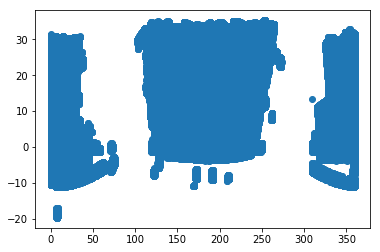

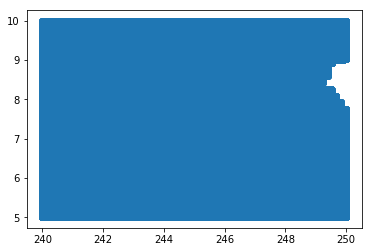

In [32]:
import matplotlib.pylab as plt 

plt.scatter(ra_MATCHED, dec_MATCHED)
plt.show()

plt.scatter(ra_ALL, dec_ALL)
plt.show()